In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set()

In [3]:
train_data = pd.read_excel('Data_Train.xlsx')
train_data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
train_data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [6]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
train_data['date'] = pd.to_datetime(train_data['Date_of_Journey'], format="%d/%m/%Y").dt.day

In [9]:
train_data['Month_of_journey'] = pd.to_datetime(train_data['Date_of_Journey'], format="%d/%m/%Y").dt.month

In [10]:
train_data.drop('Date_of_Journey', axis = 1, inplace =True)

In [11]:
train_data.head()

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   

   Arrival_Time Duration Total_Stops Additional_Info  Price  date  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897    24   
1         13:15   7h 25m     2 stops         No info   7662     1   
2  04:25 10 Jun      19h     2 stops         No info  13882     9   
3         23:30   5h 25m      1 stop         No info   6218    12   
4         21:35   4h 45m      1 stop         No info  13302     1   

   Month_of_journey  
0                 3  
1                 5  
2                 6  
3                 5  
4                 3

In [12]:
train_data['Derature hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Derature minute'] = pd.to_datetime(train_data['Dep_Time']).dt.minute
train_data.drop('Dep_Time',axis =1, inplace=True)

In [13]:
train_data.head()

Airline    Source Destination                  Route  Arrival_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL  01:10 22 Mar   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR         13:15   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK  04:25 10 Jun   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR         23:30   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL         21:35   

  Duration Total_Stops Additional_Info  Price  date  Month_of_journey  \
0   2h 50m    non-stop         No info   3897    24                 3   
1   7h 25m     2 stops         No info   7662     1                 5   
2      19h     2 stops         No info  13882     9                 6   
3   5h 25m      1 stop         No info   6218    12                 5   
4   4h 45m      1 stop         No info  13302     1                 3   

   Derature hour  Derature minute  
0             22               20  
1              5               50  
2              9               25  
3             18                5  
4             16               50

In [14]:
train_data['Arrival hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival minute'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute
train_data.drop('Arrival_Time',axis =1, inplace=True)

In [15]:
train_data.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  date  Month_of_journey  Derature hour  \
0    non-stop         No info   3897    24                 3             22   
1     2 stops         No info   7662     1                 5              5   
2     2 stops         No info  13882     9                 6              9   
3      1 stop         No info   6218    12                 5             18   
4      1 stop         No info  13302     1                 3             16   

   Derature minute  Arrival hour  Arrival minute  
0               20             1              10  
1               50            13              15  
2               25             4              25  
3                5            23              30  
4               50            21              35

In [16]:
ran = list(train_data['Duration'])
len(ran[1].split()) !=2
ran[1]

'7h 25m'

In [17]:
ran = list(train_data['Duration'])

for i in range (len(ran)):
    if len(ran[i].split()) != 2:
        if "h" in ran[i]:
            ran[i] = ran[i].strip() + " 0m"
        else:
            ran[i] = "0h " + ran[i] 
            
Duration_hour =[]
Duration_min = []

for i in range(len(ran)):
    Duration_hour.append(int(ran[i].split(sep = "h")[0]))
    Duration_min.append(int(ran[i].split(sep = "m")[0].split()[-1]))

In [18]:
train_data['Duration_hour'] = Duration_hour
train_data['Duration_min'] = Duration_min

In [19]:
val = list(train_data['Duration'])
for i in range (len(val)):
    if len(val[i].split()) != 2:
        if "h" in val[i].split():
            val[i] = val[i].split() + " 0m" 
        else:
            val[i] = "0h " + val[i]

In [20]:
val[1]

'7h 25m'

In [21]:
train_data.dropna(inplace=True)

In [22]:
train_data['total_stops'] = train_data['Route'].apply(lambda x :len(x.split('→'))-2)

In [23]:
rou = list(train_data['Route'])
val =[]
for i in range(len(rou)):
    val.append(int(len(rou[i].split('→'))))

In [24]:
train_data['total_stops'].count()

10682

In [25]:
len(val)

10682

In [26]:
train_data['Airline'].nunique()

12

In [27]:
train_data.drop('Duration', axis =1, inplace= True)

In [28]:
train_data.rename(columns={'Derature hour':'Departure_hour','Derature minute':'Departure_minute','Arrival hour':'Arrival_hour','Arrival minute':'Arrival_minute'}, inplace= True)

In [29]:
train_data.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info  Price  date  Month_of_journey  Departure_hour  \
0         No info   3897    24                 3              22   
1         No info   7662     1                 5               5   
2         No info  13882     9                 6               9   
3         No info   6218    12                 5              18   
4         No info  13302     1                 3              16   

   Departure_minute  Arrival_hour  Arrival_minute  Duration_hour  \
0                20             1              10              2   
1                50            13              15              7   
2                25             4              25             19   
3                 5            23              30              5   
4                50            21              35              4   

   Duration_min  total_stops  
0            50            0  
1            25            2  
2             0            2  
3            25            1  
4            45            1

In [30]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

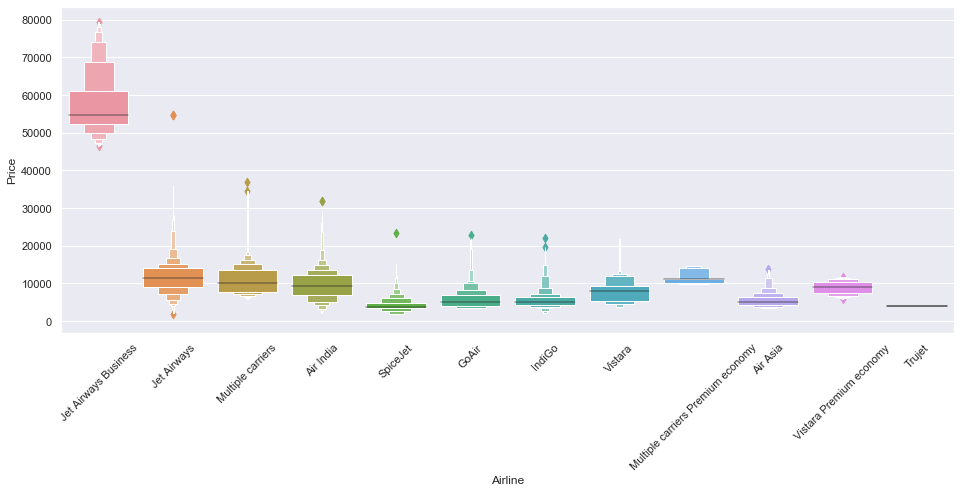

In [31]:
plt.figure(figsize=(16,6))
fig = sns.boxenplot(x = 'Airline', y = 'Price', data=train_data.sort_values('Price', ascending= False))
plt.xticks(Rotation = 45)

In [32]:
train_data.groupby('Airline')['Price'].mean()

Airline
Air Asia                              5590.260188
Air India                             9612.427756
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64

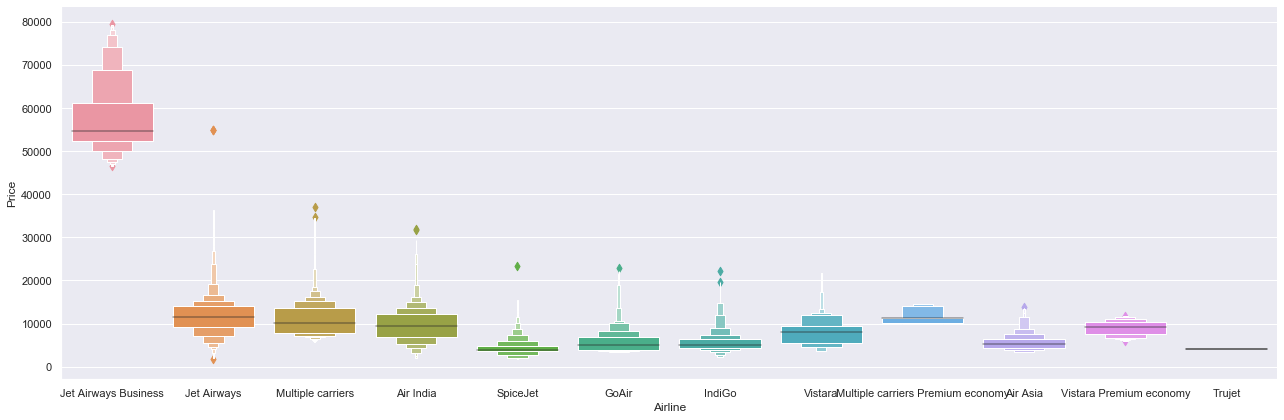

In [33]:
sns.catplot(x = 'Airline', y = 'Price', data=train_data.sort_values('Price', ascending= False),kind ='boxen', height=6, aspect=3)

In [34]:
airline = pd.get_dummies(train_data['Airline'],drop_first=True)

In [35]:
train_data = train_data.join(airline)

In [36]:
train_data.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info  Price  date  Month_of_journey  Departure_hour  \
0         No info   3897    24                 3              22   
1         No info   7662     1                 5               5   
2         No info  13882     9                 6               9   
3         No info   6218    12                 5              18   
4         No info  13302     1                 3              16   

   Departure_minute  Arrival_hour  Arrival_minute  Duration_hour  \
0                20             1              10              2   
1                50            13              15              7   
2                25             4              25             19   
3                 5            23              30              5   
4                50            21              35              4   

   Duration_min  total_stops  Air India  GoAir  IndiGo  Jet Airways  \
0            50            0          0      0       1            0   
1            25            2          1      0       0            0   
2             0            2          0      0       0            1   
3            25            1          0      0       1            0   
4            45            1          0      0       1            0   

   Jet Airways Business  Multiple carriers  Multiple carriers Premium economy  \
0                     0                  0                                  0   
1                     0                  0                                  0   
2                     0                  0                                  0   
3                     0                  0                                  0   
4                     0                  0                                  0   

   SpiceJet  Trujet  Vistara  Vistara Premium economy  
0         0       0        0                        0  
1         0       0        0                        0  
2         0       0        0                        0  
3         0       0        0                        0  
4         0       0        0                        0

In [37]:
train_data.groupby(['Source','Destination'])['Price'].mean().sort_values(ascending=False)

Source    Destination
Banglore  New Delhi      11917.716738
Delhi     Cochin         10540.113536
Kolkata   Banglore        9158.389411
Banglore  Delhi           5143.918577
Mumbai    Hyderabad       5059.708752
Chennai   Kolkata         4789.892388
Name: Price, dtype: float64

In [38]:
train_data['Destination'].replace({'New Delhi':'Delhi'}, inplace = True)

In [39]:
train_data.groupby(['Source','Destination'])['Price'].mean().sort_values(ascending=False)

Source    Destination
Delhi     Cochin         10540.113536
Kolkata   Banglore        9158.389411
Banglore  Delhi           8017.464269
Mumbai    Hyderabad       5059.708752
Chennai   Kolkata         4789.892388
Name: Price, dtype: float64

In [40]:
train_data[train_data['Source']=='Banglore']

Airline    Source Destination            Route Total_Stops  \
0           IndiGo  Banglore       Delhi        BLR → DEL    non-stop   
4           IndiGo  Banglore       Delhi  BLR → NAG → DEL      1 stop   
6      Jet Airways  Banglore       Delhi  BLR → BOM → DEL      1 stop   
7      Jet Airways  Banglore       Delhi  BLR → BOM → DEL      1 stop   
8      Jet Airways  Banglore       Delhi  BLR → BOM → DEL      1 stop   
...            ...       ...         ...              ...         ...   
10667  Jet Airways  Banglore       Delhi  BLR → BOM → DEL      1 stop   
10674  Jet Airways  Banglore       Delhi  BLR → BOM → DEL      1 stop   
10677     SpiceJet  Banglore       Delhi        BLR → DEL    non-stop   
10680  Jet Airways  Banglore       Delhi        BLR → DEL    non-stop   
10681      Vistara  Banglore       Delhi        BLR → DEL    non-stop   

                    Additional_Info  Price  date  Month_of_journey  \
0                           No info   3897    24                 3   
4                           No info  13302     1                 3   
6       In-flight meal not included  11087    12                 3   
7                           No info  22270     1                 3   
8       In-flight meal not included  11087    12                 3   
...                             ...    ...   ...               ...   
10667   In-flight meal not included  11087    12                 3   
10674   In-flight meal not included  11087    12                 3   
10677  No check-in baggage included   3257    21                 5   
10680                       No info   7229    27                 4   
10681                       No info  12648     1                 3   

       Departure_hour  Departure_minute  Arrival_hour  Arrival_minute  \
0                  22                20             1              10   
4                  16                50            21              35   
6                  18                55            10              25   
7                   8                 0             5               5   
8                   8                55            10              25   
...               ...               ...           ...             ...   
10667              22                55            20              20   
10674              20                35            21              20   
10677               5                55             8              35   
10680               8                20            11              20   
10681              11                30            14              10   

       Duration_hour  Duration_min  total_stops  Air India  GoAir  IndiGo  \
0                  2            50            0          0      0       1   
4                  4            45            1          0      0       1   
6                 15            30            1          0      0       0   
7                 21             5            1          0      0       0   
8                 25            30            1          0      0       0   
...              ...           ...          ...        ...    ...     ...   
10667             21            25            1          0      0       0   
10674             24            45            1          0      0       0   
10677              2            40            0          0      0       0   
10680              3             0            0          0      0       0   
10681              2            40            0          0      0       0   

       Jet Airways  Jet Airways Business  Multiple carriers  \
0                0                     0                  0   
4                0                     0                  0   
6                1                     0                  0   
7                1                     0                  0   
8                1                     0                  0   
...            ...                   ...                ...   
10667            1                     0          

In [41]:
cl =train_data[train_data['Source'] == 'Banglore']

In [42]:
cl.groupby('Source')['Destination'].value_counts()

Source    Destination
Banglore  Delhi          2197
Name: Destination, dtype: int64

In [43]:
cl.groupby(['Source','Destination'])['Price'].mean()

Source    Destination
Banglore  Delhi          8017.464269
Name: Price, dtype: float64

In [44]:
train_data.drop('Airline',axis =1, inplace=True)

In [45]:
train_data.head()

Source Destination                  Route Total_Stops Additional_Info  \
0  Banglore       Delhi              BLR → DEL    non-stop         No info   
1   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops         No info   
2     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops         No info   
3   Kolkata    Banglore        CCU → NAG → BLR      1 stop         No info   
4  Banglore       Delhi        BLR → NAG → DEL      1 stop         No info   

   Price  date  Month_of_journey  Departure_hour  Departure_minute  \
0   3897    24                 3              22                20   
1   7662     1                 5               5                50   
2  13882     9                 6               9                25   
3   6218    12                 5              18                 5   
4  13302     1                 3              16                50   

   Arrival_hour  Arrival_minute  Duration_hour  Duration_min  total_stops  \
0             1              10              2            50            0   
1            13              15              7            25            2   
2             4              25             19             0            2   
3            23              30              5            25            1   
4            21              35              4            45            1   

   Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0          0      0       1            0                     0   
1          1      0       0            0                     0   
2          0      0       0            1                     0   
3          0      0       1            0                     0   
4          0      0       1            0                     0   

   Multiple carriers  Multiple carriers Premium economy  SpiceJet  Trujet  \
0                  0                                  0         0       0   
1                  0                                  0         0       0   
2                  0                                  0         0       0   
3                  0                                  0         0       0   
4                  0                                  0         0       0   

   Vistara  Vistara Premium economy  
0        0                        0  
1        0                        0  
2        0                        0  
3        0                        0  
4        0                        0

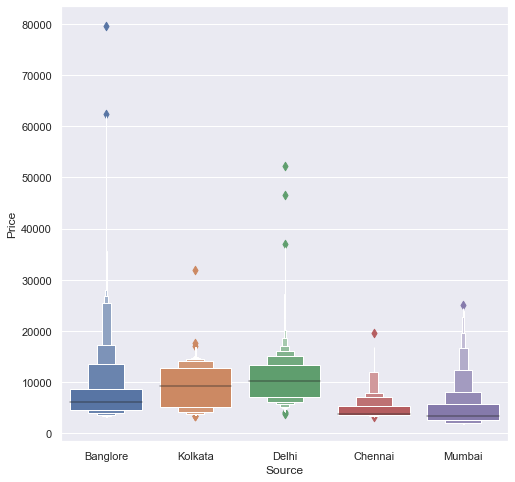

In [46]:
plt.figure(figsize=(8,8))
sns.boxenplot(train_data['Source'],train_data['Price'])

In [47]:
source = pd.get_dummies(train_data['Source'], drop_first=True)
train_data = train_data.join(source)


In [48]:
train_data.head()

Source Destination                  Route Total_Stops Additional_Info  \
0  Banglore       Delhi              BLR → DEL    non-stop         No info   
1   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops         No info   
2     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops         No info   
3   Kolkata    Banglore        CCU → NAG → BLR      1 stop         No info   
4  Banglore       Delhi        BLR → NAG → DEL      1 stop         No info   

   Price  date  Month_of_journey  Departure_hour  Departure_minute  \
0   3897    24                 3              22                20   
1   7662     1                 5               5                50   
2  13882     9                 6               9                25   
3   6218    12                 5              18                 5   
4  13302     1                 3              16                50   

   Arrival_hour  Arrival_minute  Duration_hour  Duration_min  total_stops  \
0             1              10              2            50            0   
1            13              15              7            25            2   
2             4              25             19             0            2   
3            23              30              5            25            1   
4            21              35              4            45            1   

   Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0          0      0       1            0                     0   
1          1      0       0            0                     0   
2          0      0       0            1                     0   
3          0      0       1            0                     0   
4          0      0       1            0                     0   

   Multiple carriers  Multiple carriers Premium economy  SpiceJet  Trujet  \
0                  0                                  0         0       0   
1                  0                                  0         0       0   
2                  0                                  0         0       0   
3                  0                                  0         0       0   
4                  0                                  0         0       0   

   Vistara  Vistara Premium economy  Chennai  Delhi  Kolkata  Mumbai  
0        0                        0        0      0        0       0  
1        0                        0        0      0        1       0  
2        0                        0        0      1        0       0  
3        0                        0        0      0        1       0  
4        0                        0        0      0        0       0

In [49]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [50]:
de = list(train_data['Destination'])
for i in range(len(de)):
    de[i] = "des_"+de[i]

In [51]:
train_data['Destination'] = de

In [52]:
train_data.drop('Source', axis = 1, inplace= True)

In [53]:
dess = train_data[['Destination']]
dess = pd.get_dummies(train_data['Destination'],drop_first=True)
dess.head()

des_Cochin  des_Delhi  des_Hyderabad  des_Kolkata
0           0          1              0            0
1           0          0              0            0
2           1          0              0            0
3           0          0              0            0
4           0          1              0            0

In [54]:
train_data = train_data.join(dess)

In [55]:
train_data.drop(['Additional_Info','Route'], axis=1, inplace= True)

In [56]:
train_data.drop('Destination',axis = 1, inplace = True)

In [57]:
train_data.drop('Total_Stops',axis = 1, inplace = True)

In [58]:
train_data.head()

Price  date  Month_of_journey  Departure_hour  Departure_minute  \
0   3897    24                 3              22                20   
1   7662     1                 5               5                50   
2  13882     9                 6               9                25   
3   6218    12                 5              18                 5   
4  13302     1                 3              16                50   

   Arrival_hour  Arrival_minute  Duration_hour  Duration_min  total_stops  \
0             1              10              2            50            0   
1            13              15              7            25            2   
2             4              25             19             0            2   
3            23              30              5            25            1   
4            21              35              4            45            1   

   Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0          0      0       1            0                     0   
1          1      0       0            0                     0   
2          0      0       0            1                     0   
3          0      0       1            0                     0   
4          0      0       1            0                     0   

   Multiple carriers  Multiple carriers Premium economy  SpiceJet  Trujet  \
0                  0                                  0         0       0   
1                  0                                  0         0       0   
2                  0                                  0         0       0   
3                  0                                  0         0       0   
4                  0                                  0         0       0   

   Vistara  Vistara Premium economy  Chennai  Delhi  Kolkata  Mumbai  \
0        0                        0        0      0        0       0   
1        0                        0        0      0        1       0   
2        0                        0        0      1        0       0   
3        0                        0        0      0        1       0   
4        0                        0        0      0        0       0   

   des_Cochin  des_Delhi  des_Hyderabad  des_Kolkata  
0           0          1              0            0  
1           0          0              0            0  
2           1          0              0            0  
3           0          0              0            0  
4           0          1              0            0

In [59]:
train_data.shape

(10682, 29)

In [60]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [61]:
train_data.head()

Price  date  Month_of_journey  Departure_hour  Departure_minute  \
0   3897    24                 3              22                20   
1   7662     1                 5               5                50   
2  13882     9                 6               9                25   
3   6218    12                 5              18                 5   
4  13302     1                 3              16                50   

   Arrival_hour  Arrival_minute  Duration_hour  Duration_min  total_stops  \
0             1              10              2            50            0   
1            13              15              7            25            2   
2             4              25             19             0            2   
3            23              30              5            25            1   
4            21              35              4            45            1   

   Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0          0      0       1            0                     0   
1          1      0       0            0                     0   
2          0      0       0            1                     0   
3          0      0       1            0                     0   
4          0      0       1            0                     0   

   Multiple carriers  Multiple carriers Premium economy  SpiceJet  Trujet  \
0                  0                                  0         0       0   
1                  0                                  0         0       0   
2                  0                                  0         0       0   
3                  0                                  0         0       0   
4                  0                                  0         0       0   

   Vistara  Vistara Premium economy  Chennai  Delhi  Kolkata  Mumbai  \
0        0                        0        0      0        0       0   
1        0                        0        0      0        1       0   
2        0                        0        0      1        0       0   
3        0                        0        0      0        1       0   
4        0                        0        0      0        0       0   

   des_Cochin  des_Delhi  des_Hyderabad  des_Kolkata  
0           0          1              0            0  
1           0          0              0            0  
2           1          0              0            0  
3           0          0              0            0  
4           0          1              0            0

In [62]:
px.scatter(train_data['Month_of_journey'])

In [66]:
val = train_data['Departure_hour'].value_counts()
val

9     915
7     867
8     697
17    695
6     687
20    651
5     629
11    580
19    567
10    536
14    523
21    492
16    472
18    444
13    417
22    387
15    319
2     194
12    178
4     170
23    161
0      40
1      37
3      24
Name: Departure_hour, dtype: int64

In [73]:
fig = px.bar(data_frame= val, x = val.index, y= val.values, title='Filght Counts Depending on Departure Hour',
            labels={'index':'Flight Timings',
                   'y':'Flight Numbers'})
fig.show()

In [78]:
fig= px.box(data_frame= train_data, x = train_data['Departure_hour'], y = train_data['Price']
           , title='Flight Price Depending on Hours')
fig.show()

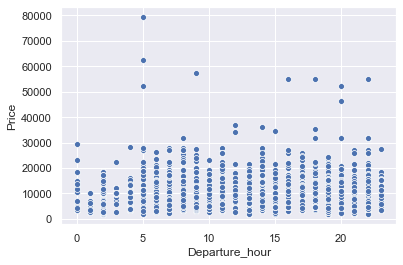

In [64]:
sns.scatterplot(train_data['Departure_hour'], train_data['Price'])

### Test Data

In [199]:

test_data = pd.read_excel('Test_set.xlsx')
test_data.head()

pd.set_option('display.max_columns', None)

test_data.head()

test_data.dtypes

test_data.info()

test_data['date'] = pd.to_datetime(test_data['Date_of_Journey'], format="%d/%m/%Y").dt.day

test_data['Month_of_journey'] = pd.to_datetime(test_data['Date_of_Journey'], format="%d/%m/%Y").dt.month

test_data.drop('Date_of_Journey', axis = 1, inplace =True)

test_data.head()

test_data['Derature hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Derature minute'] = pd.to_datetime(test_data['Dep_Time']).dt.minute
test_data.drop('Dep_Time',axis =1, inplace=True)

test_data.head()

test_data['Arrival hour'] = pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival minute'] = pd.to_datetime(test_data['Arrival_Time']).dt.minute
test_data.drop('Arrival_Time',axis =1, inplace=True)

test_data.head()

ran = list(test_data['Duration'])
len(ran[1].split()) !=2
ran[1]

ran = list(test_data['Duration'])

for i in range (len(ran)):
    if len(ran[i].split()) != 2:
        if "h" in ran[i]:
            ran[i] = ran[i].strip() + " 0m"
        else:
            ran[i] = "0h " + ran[i] 
            
Duration_hour =[]
Duration_min = []

for i in range(len(ran)):
    Duration_hour.append(int(ran[i].split(sep = "h")[0]))
    Duration_min.append(int(ran[i].split(sep = "m")[0].split()[-1]))

test_data['Duration_hour'] = Duration_hour
test_data['Duration_min'] = Duration_min

val = list(test_data['Duration'])
for i in range (len(val)):
    if len(val[i].split()) != 2:
        if "h" in val[i].split():
            val[i] = val[i].split() + " 0m" 
        else:
            val[i] = "0h " + val[i]

test_data.dropna(inplace=True)

test_data['total_stops'] = test_data['Route'].apply(lambda x :len(x.split('→'))-2)

rou = list(test_data['Route'])
val =[]
for i in range(len(rou)):
    val.append(int(len(rou[i].split('→'))))

test_data['total_stops'].count()

len(val)

test_data['Airline'].nunique()

test_data.drop('Duration', axis =1, inplace= True)

test_data.head()

test_data['Airline'].value_counts()




airline = pd.get_dummies(test_data['Airline'],drop_first=True)

test_data = test_data.join(airline)

test_data.head()


test_data['Destination'].replace({'New Delhi':'Delhi'}, inplace = True)


test_data[test_data['Source']=='Banglore']

cl =test_data[test_data['Source'] == 'Banglore']

cl.groupby('Source')['Destination'].value_counts()


test_data.drop('Airline',axis =1, inplace=True)

test_data.head()



source = pd.get_dummies(test_data['Source'], drop_first=True)
test_data = test_data.join(source)


test_data.head()

test_data['Destination'].value_counts()

de = list(test_data['Destination'])
for i in range(len(de)):
    de[i] = "des_"+de[i]

test_data['Destination'] = de

test_data.drop('Source', axis = 1, inplace= True)

dess = test_data[['Destination']]
dess = pd.get_dummies(test_data['Destination'],drop_first=True)
dess.head()

test_data = test_data.join(dess)

test_data.drop(['Additional_Info','Route'], axis=1, inplace= True)

test_data.drop('Destination',axis = 1, inplace = True)

test_data.drop('Total_Stops',axis = 1, inplace = True)

test_data.head()

test_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


(2671, 27)

In [200]:
test_data.shape, train_data.shape

((2671, 27), (10682, 29))

In [201]:
test_data.head()

date  Month_of_journey  Derature hour  Derature minute  Arrival hour  \
0     6                 6             17               30             4   
1    12                 5              6               20            10   
2    21                 5             19               15            19   
3    21                 5              8                0            21   
4    24                 6             23               55             2   

   Arrival minute  Duration_hour  Duration_min  total_stops  Air India  GoAir  \
0              25             10            55            1          0      0   
1              20              4             0            1          0      0   
2               0             23            45            1          0      0   
3               0             13             0            1          0      0   
4              45              2            50            0          0      0   

   IndiGo  Jet Airways  Jet Airways Business  Multiple carriers  \
0       0            1                     0                  0   
1       1            0                     0                  0   
2       0            1                     0                  0   
3       0            0                     0                  1   
4       0            0                     0                  0   

   Multiple carriers Premium economy  SpiceJet  Vistara  \
0                                  0         0        0   
1                                  0         0        0   
2                                  0         0        0   
3                                  0         0        0   
4                                  0         0        0   

   Vistara Premium economy  Chennai  Delhi  Kolkata  Mumbai  des_Cochin  \
0                        0        0      1        0       0           1   
1                        0        0      0        1       0           0   
2                        0        0      1        0       0           1   
3                        0        0      1        0       0           1   
4                        0        0      0        0       0           0   

   des_Delhi  des_Hyderabad  des_Kolkata  
0          0              0            0  
1          0              0            0  
2          0              0            0  
3          0              0            0  
4          1              0            0

## Feature Selection

Now in this step we'll working with all the features that we have got till now to figure out which one is the best

In [202]:
train_data.columns

Index(['Price', 'date', 'Month_of_journey', 'Departure_hour',
       'Departure_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hour',
       'Duration_min', 'total_stops', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'des_Cochin', 'des_Delhi', 'des_Hyderabad', 'des_Kolkata'],
      dtype='object')

In [203]:
X = train_data.drop('Price',axis =1)

In [204]:
y = train_data['Price']

In [205]:
X.columns

Index(['date', 'Month_of_journey', 'Departure_hour', 'Departure_minute',
       'Arrival_hour', 'Arrival_minute', 'Duration_hour', 'Duration_min',
       'total_stops', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'des_Cochin', 'des_Delhi', 'des_Hyderabad', 'des_Kolkata'],
      dtype='object')

In [206]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [207]:
X.shape

(10682, 28)

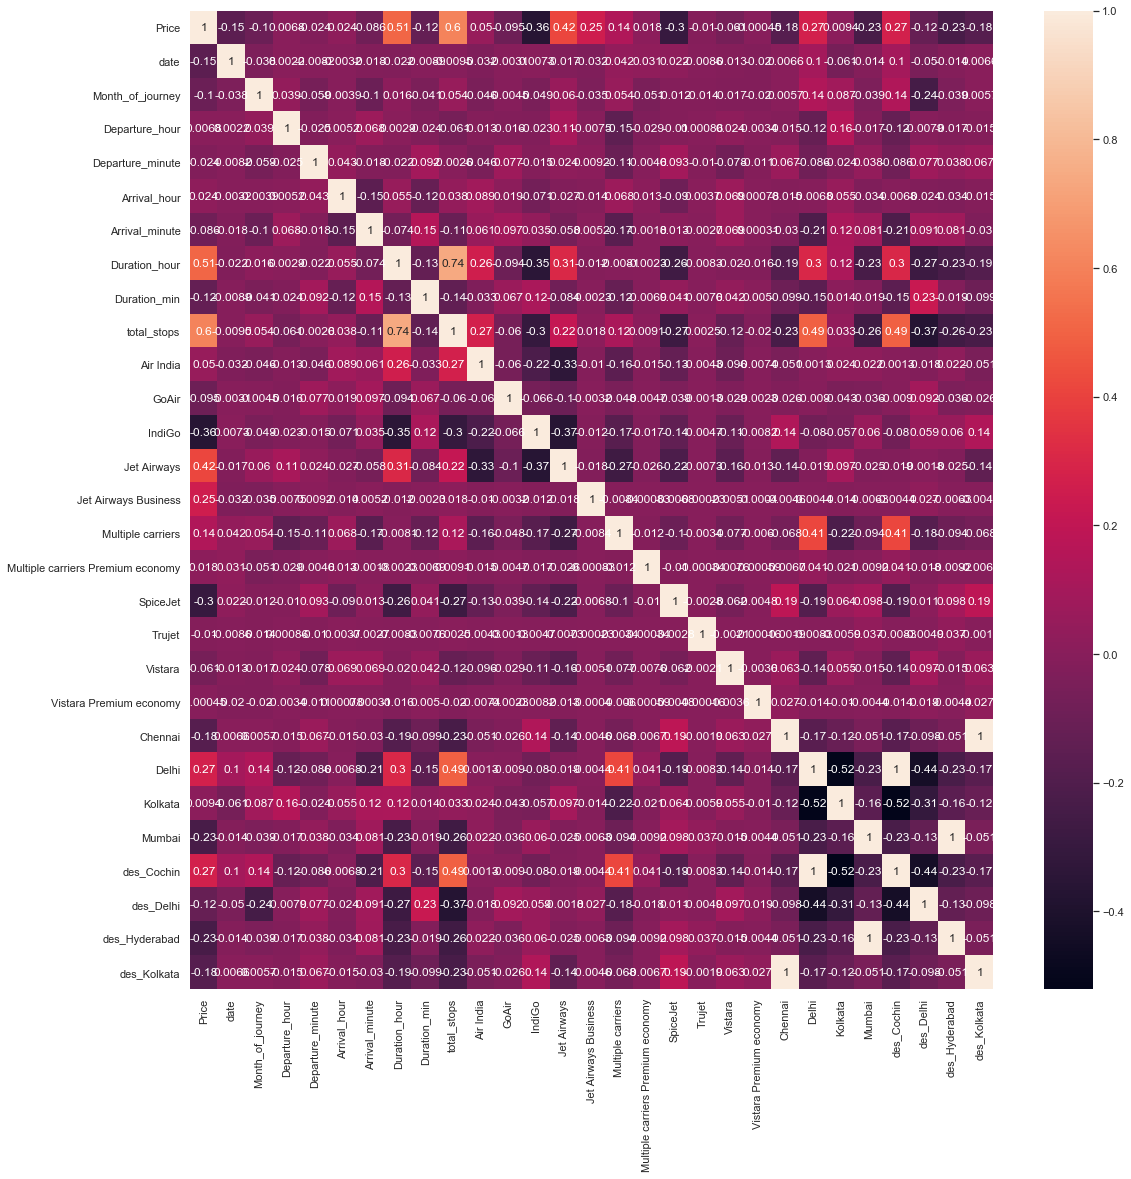

In [208]:
#this will tell us the correlation between dependent and independent features
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True)

In [209]:
from sklearn.ensemble import ExtraTreesRegressor

ext = ExtraTreesRegressor()
ext = ext.fit(X,y)

In [210]:
ext.feature_importances_

array([1.42886573e-01, 5.88498148e-02, 2.48798793e-02, 2.09371976e-02,
       2.75366290e-02, 1.96073896e-02, 1.22410033e-01, 1.76801997e-02,
       2.27988113e-01, 1.03334371e-02, 1.88525789e-03, 1.92528390e-02,
       1.42157325e-01, 6.78005571e-02, 1.89252028e-02, 8.93276452e-04,
       4.90051719e-03, 8.78890511e-05, 4.52633441e-03, 6.94997842e-05,
       5.39166519e-04, 1.10568396e-02, 4.62879341e-03, 5.97916590e-03,
       1.47328429e-02, 1.86987057e-02, 1.00290467e-02, 7.27474876e-04])

In [211]:
val = pd.Series(ext.feature_importances_, index=X.columns)
val.nlargest(20)

total_stops             0.227988
date                    0.142887
Jet Airways             0.142157
Duration_hour           0.122410
Jet Airways Business    0.067801
Month_of_journey        0.058850
Arrival_hour            0.027537
Departure_hour          0.024880
Departure_minute        0.020937
Arrival_minute          0.019607
IndiGo                  0.019253
Multiple carriers       0.018925
des_Delhi               0.018699
Duration_min            0.017680
des_Cochin              0.014733
Delhi                   0.011057
Air India               0.010333
des_Hyderabad           0.010029
Mumbai                  0.005979
SpiceJet                0.004901
dtype: float64

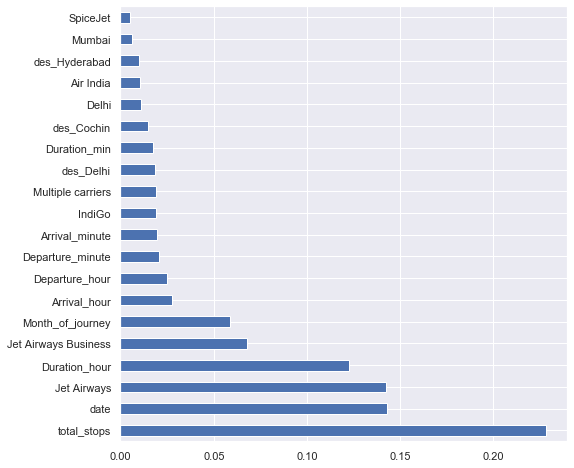

In [212]:
plt.figure(figsize=(8,8))
val.nlargest(20).plot(kind ='barh')

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,precision_score,accuracy_score

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [215]:
rnd  = RandomForestRegressor()
rnd.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [216]:
rnd1 = RandomForestRegressor()
rnd1.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [217]:
rnd1.feature_importances_

array([1.38063522e-01, 5.72104339e-02, 2.74204527e-02, 2.18156252e-02,
       3.33099825e-02, 2.22156065e-02, 4.43131370e-01, 1.82064422e-02,
       3.17161127e-02, 5.71155693e-03, 1.24951837e-03, 6.30357727e-03,
       6.62226986e-02, 6.05580468e-02, 1.98159806e-02, 8.66410714e-04,
       3.51627430e-03, 9.65786382e-06, 3.89294532e-03, 2.33180747e-05,
       3.44130244e-04, 3.11061964e-03, 5.62609079e-03, 4.10068354e-03,
       2.57617925e-03, 1.76309640e-02, 4.94521776e-03, 4.06582363e-04])

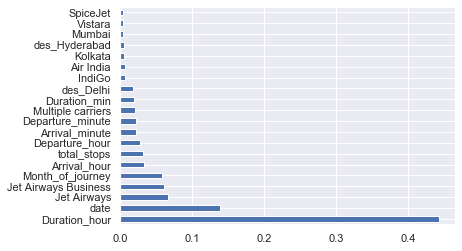

In [218]:
ens = rnd1.feature_importances_
ens = pd.Series(ens, index=X.columns)
ens.nlargest(20).plot(kind = 'barh')

In [219]:
pred = rnd.predict(X_test)
pred.shape

(2137,)

In [220]:
y_test.shape

(2137,)

In [221]:
rnd.score(X_train,y_train)

0.9533136943681939

In [222]:
rnd.score(X_test,y_test)

0.7922003220590415

In [223]:
metrics.r2_score(y_test,pred)

0.7922003220590416

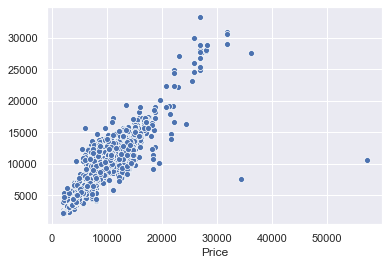

In [224]:
sns.scatterplot(y_test,pred)

# Hyperparamert Tuning

In [225]:
from sklearn.model_selection import RandomizedSearchCV

In [226]:
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [227]:
[int(x) for x in np.linspace(2,30,6)]

[2, 7, 13, 18, 24, 30]

In [228]:
n_estimators = [int(x) for x in np.linspace(start = 100,stop = 1200,num = 12)]
max_features  = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,6)]
min_samples_split  = [2,5,10,15,100]
min_samples_leaf  = [1,2,5,10]

In [229]:
random_grid = {'max_features': max_features,
              'n_estimators': n_estimators,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}

In [230]:
rf_rand = RandomizedSearchCV(estimator=rnd,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv= 5,verbose=2,random_state=42,n_jobs=1)

In [231]:
rf1_rand = rf_rand.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   7.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.5min finished


In [232]:
rf1_rand.score(X_test,y_test)

-4133067.3471313

In [233]:
rf_rand.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [234]:
predict = rf_rand.predict(X_test)

In [235]:
metrics.accuracy_score(y_test)

TypeError: accuracy_score() missing 1 required positional argument: 'y_pred'

In [ ]:
rf_rand.score(X_test,y_test)

In [ ]:
rf = RandomForestRegressor(n_estimators= 700,min_samples_split =  15,min_samples_leaf =  1,max_features = 'auto',max_depth = 20)

In [ ]:
rf.fit(X_train,y_train)

In [ ]:
rf.score(X_train,y_train)

In [ ]:
y_test

In [ ]:
rf.score(X_test,y_test)

In [ ]:
prd = rf.predict(X_test)

In [ ]:
metrics.r2_score(y_test,prd)

In [ ]:
rf

In [236]:
from sklearn.linear_model import LinearRegression

In [237]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [238]:
lr.score(X_test,y_test)

0.599957628935733

In [239]:
import pickle

In [240]:
filename = 'flight_price_predictor1.pkl'
pickle.dump(lr, open(filename, 'wb'))

In [241]:
filename = 'flight_price_predictor.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [242]:
X_train

date  Month_of_journey  Departure_hour  Departure_minute  Arrival_hour  \
10005    27                 5               8                30            19   
3684      9                 5              11                30            12   
1034     24                 4              15                45            22   
3909     21                 3              12                50             1   
3088     24                 6              17                15            19   
...     ...               ...             ...               ...           ...   
5734     27                 3               9                 0             4   
5191      9                 5              14                 5            20   
5390     15                 5              12                50             1   
860       3                 3               0                40             3   
7270      1                 6              13                 0             4   

       Arrival_minute  Duration_hour  Duration_min  total_stops  Air India  \
10005              15             10            45            1          0   
3684               35             25             5            1          0   
1034                5              6            20            1          0   
3909               35             12            45            1          0   
3088               15             26             0            2          1   
...               ...            ...           ...          ...        ...   
5734               25             19            25            1          0   
5191               45              6            40            1          0   
5390               30             12            40            1          0   
860                25              2            45            0          0   
7270               25             15            25            1          0   

       GoAir  IndiGo  Jet Airways  Jet Airways Business  Multiple carriers  \
10005      0       0            0                     0                  1   
3684       0       0            1                     0                  0   
1034       0       0            0                     0                  0   
3909       0       0            0                     0                  1   
3088       0       0            0                     0                  0   
...      ...     ...          ...                   ...                ...   
5734       0       0            1                     0                  0   
5191       0       0            1                     0                  0   
5390       0       0            0                     0                  1   
860        0       1            0                     0                  0   
7270       0       0            1                     0                  0   

       Multiple carriers Premium economy  SpiceJet  Trujet  Vistara  \
10005                                  0         0       0        0   
3684                                   0         0       0        0   
1034                                   0         1       0        0   
3909                                   0         0       0        0   
3088                                   0         0       0        0   
...                                  ...       ...     ...      ...   
5734                                   0         0       0        0   
5191                                   0         0       0        0   
5390                                   0         0       0        0   
860                                    0         0       0        0   
7270                                   0         0       0        0   

       Vistara Premium economy  Chennai  Delhi  Kolkata  Mumbai  des_Cochin  \
10005                        0        0      1        0       0           1   
3684                         0        0      1        0       0           1   
1034                         0        0      1        0       0       

In [120]:
X_train.dtypes

date                                 int64
Month_of_journey                     int64
Derature hour                        int64
Derature minute                      int64
Arrival hour                         int64
Arrival minute                       int64
Duration_hour                        int64
Duration_min                         int64
total_stops                          int64
Air India                            uint8
GoAir                                uint8
IndiGo                               uint8
Jet Airways                          uint8
Jet Airways Business                 uint8
Multiple carriers                    uint8
Multiple carriers Premium economy    uint8
SpiceJet                             uint8
Trujet                               uint8
Vistara                              uint8
Vistara Premium economy              uint8
Chennai                              uint8
Delhi                                uint8
Kolkata                              uint8
Mumbai     

In [123]:
y_test

6075     16655
3544      4959
9291      9187
5032      3858
2483     12898
         ...  
9797      7408
9871      4622
10063     7452
8802      8824
8617     14151
Name: Price, Length: 2137, dtype: int64

In [243]:
lr.predict()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [255]:
v =[1,4,5,76]
z  =[76,345,6]
d = v+z
np.array(d)

array([  1,   4,   5,  76,  76, 345,   6])

In [256]:
team_array = [1,0,0,0,0]
team_array+[2,0,0,0]

[1, 0, 0, 0, 0, 2, 0, 0, 0]